In [36]:
!pip install PySimpleGUI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
#plt.style.use('ggplot')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from IPython.core.interactiveshell import default
url = '/content/drive/MyDrive/Colab Notebooks/data_unificada2.csv'
dataframe = pd.read_csv(url, sep=',')
dataframe.head()

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,grupo_mate,genero,anios_colegio,condicion_pago,pe1,pe2,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,0,M,3,deuda,Facil,Bueno,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,0,F,3,deuda,Facil,Excelente,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,0,M,3,deuda,Ni facil ni dificil,Indiferente,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,0,F,3,deuda,Facil,Excelente,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,0,M,3,deuda,Ni facil ni dificil,Indiferente,1 hora,Indiferente,2,Media


In [39]:
dataframe.describe()

,id,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,alg_3b_2021,...,pf_geo_2019,pf_geo_2020,geo_1b_2021,geo_2b_2021,geo_3b_2021,geo_4b_2021,ind_nivel_geo,grupo_mate,anios_colegio,dispos_clases
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,356.000000,15.434599,14.115331,15.253165,17.571027,14.867792,14.807314,14.251758,14.510549,15.140647,...,14.153305,14.222222,13.973277,13.376934,13.886076,14.696203,2.502110,0.066104,3.988748,2.596343
std,205.392308,0.970486,2.643766,2.638403,2.018284,2.653080,2.670286,2.640405,2.670040,3.289748,...,2.384897,2.476620,2.346857,3.019416,2.986300,3.091191,0.511483,0.248639,0.818716,1.194560
min,1.000000,14.000000,6.000000,6.000000,9.000000,11.000000,6.000000,7.000000,5.000000,5.000000,...,8.000000,9.000000,5.000000,5.000000,5.000000,4.000000,1.000000,0.000000,3.000000,1.000000
25%,178.500000,15.000000,12.000000,14.000000,16.000000,13.000000,13.000000,12.000000,13.000000,13.000000,...,12.000000,12.000000,12.000000,11.000000,12.000000,13.000000,2.000000,0.000000,3.000000,2.000000
50%,356.000000,15.000000,14.000000,16.000000,18.000000,15.000000,15.000000,14.000000,15.000000,15.000000,...,14.000000,14.000000,14.000000,13.000000,14.000000,15.000000,3.000000,0.000000,4.000000,3.000000
75%,533.500000,16.000000,16.000000,17.000000,19.000000,17.000000,17.000000,16.000000,16.000000,18.000000,...,16.000000,16.000000,16.000000,15.000000,16.000000,17.000000,3.000000,0.000000,5.000000,4.000000
max,711.000000,17.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,29.000000,3.000000,1.000000,5.000000,5.000000


In [40]:
values_seccion = dataframe["seccion"].astype("category").cat.codes
dataframe["seccion"] = values_seccion

values_genero = dataframe["genero"].astype("category").cat.codes
dataframe["genero"] = values_genero

values_condicion_pago = dataframe["condicion_pago"].astype("category").cat.codes
dataframe["condicion_pago"] = values_condicion_pago

mapping_pe1 = {"Muy facil": 0,"Facil": 1,"Ni facil ni dificil": 2,"Dificil": 3,"Muy Dificil": 4}
dataframe["pe1"] = dataframe["pe1"].replace(mapping_pe1)

mapping_pe2 = {"Excelente": 0,"Bueno": 1,"Indiferente": 2,"Malo": 3,"Pesimo": 4}
dataframe["pe2"] = dataframe["pe2"].replace(mapping_pe2)

mapping_horas_asincronas = {"De 4 horas a mas": 0,"3 horas": 1,"2 horas": 2,"1 hora": 3,"Solo las horas de clase": 4}
dataframe["horas_asincronas"] = dataframe["horas_asincronas"].replace(mapping_horas_asincronas)

mapping_valoracion_clases = {"Muy satisfecho": 0,"Satisfecho": 1,"Indiferente": 2,"Insatisfecho": 3,"Muy insatisfecho": 4}
dataframe["valoracion_clases"] = dataframe["valoracion_clases"].replace(mapping_valoracion_clases)

mapping_calidad_internet = {"Muy buena": 0,"Buena": 1,"Media": 2,"Mala": 3,"Muy mala": 4}
dataframe["calidad_internet"] = dataframe["calidad_internet"].replace(mapping_calidad_internet)


In [41]:
dataframe1= [dataframe]
for dataset in dataframe1:
  dataset['Result'] = (dataset['ind_nivel_algebra'] + dataset['ind_nivel_am'] + dataset['ind_nivel_geo'])/3
  dataset['Result'] = round(dataset['Result'])
  dataset['Result'] = dataset['Result'].astype(int)

dataframe = dataframe.drop("ind_nivel_algebra", axis=1)
dataframe = dataframe.drop("ind_nivel_am", axis=1)
dataframe = dataframe.drop("ind_nivel_geo", axis=1)

In [42]:
dataframe.head()

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,genero,anios_colegio,condicion_pago,pe1,pe2,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet,Result
0,1,0,15,13,19,14,16,15,16,16,...,2,3,1,1,1,1,1,1,1,2
1,2,0,14,16,19,17,16,17,17,16,...,1,3,1,1,0,0,0,4,0,3
2,3,0,14,11,18,11,11,13,12,12,...,2,3,1,2,2,3,2,1,2,2
3,4,0,14,17,17,19,18,16,16,16,...,1,3,1,1,0,0,0,2,0,3
4,5,0,15,8,9,11,11,11,12,11,...,2,3,1,2,2,3,2,2,2,2


In [43]:
dataframe.describe()

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,genero,anios_colegio,condicion_pago,pe1,pe2,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet,Result
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,356.000000,3.518987,15.434599,14.115331,15.253165,17.571027,14.867792,14.807314,14.251758,14.510549,...,1.604782,3.988748,0.933896,1.092827,0.998594,1.030942,1.011252,2.596343,1.008439,2.489451
std,205.392308,2.468818,0.970486,2.643766,2.638403,2.018284,2.653080,2.670286,2.640405,2.670040,...,0.494966,0.818716,0.248639,0.662766,0.601639,0.624972,0.618847,1.194560,0.612027,0.519576
min,1.000000,0.000000,14.000000,6.000000,6.000000,9.000000,11.000000,6.000000,7.000000,5.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,178.500000,1.000000,15.000000,12.000000,14.000000,16.000000,13.000000,13.000000,12.000000,13.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,356.000000,3.000000,15.000000,14.000000,16.000000,18.000000,15.000000,15.000000,14.000000,15.000000,...,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000
75%,533.500000,5.000000,16.000000,16.000000,17.000000,19.000000,17.000000,17.000000,16.000000,16.000000,...,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000
max,711.000000,9.000000,17.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,3.000000,5.000000,1.000000,4.000000,2.000000,3.000000,3.000000,5.000000,3.000000,3.000000


In [44]:
import os
filename = 'base_datos3.csv'
ruta_completa = os.path.join(os.getcwd(), filename)
dataframe.to_csv(ruta_completa)

print(ruta_completa)

/content/base_datos3.csv


In [45]:
#X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
#               'alg_3b_2021','alg_4b_2021','grupo_mate','genero',
#               'anios_colegio','condicion_pago','pe1','pe2','horas_asincronas','valoracion_clases',
#               'dispos_clases','calidad_internet']].values
#y = dataframe['ind_nivel_algebra'].values

y = dataframe["Result"]
X = dataframe.drop("Result", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_test

array([[0.47605634, 0.22222222, 0.33333333, ..., 0.66666667, 0.        ,
        0.66666667],
       [0.2       , 0.44444444, 0.33333333, ..., 0.33333333, 0.        ,
        0.33333333],
       [0.34084507, 0.88888889, 0.33333333, ..., 0.        , 0.25      ,
        0.        ],
       ...,
       [0.1084507 , 0.22222222, 0.33333333, ..., 0.33333333, 0.        ,
        0.33333333],
       [0.3028169 , 0.77777778, 0.33333333, ..., 0.33333333, 0.75      ,
        0.33333333],
       [0.69295775, 0.        , 0.66666667, ..., 0.66666667, 0.25      ,
        0.66666667]])

In [47]:
X_test.shape

(178, 34)

In [48]:
def findOptimK(k_candidate):
  n_neighbors = k_candidate
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
  print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

for k in [1,2,3,4,5,6,7,8,9,10]:
  print(k)
  findOptimK(k)

1
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.88
2
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.85
3
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.86
4
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.89
5
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.90
6
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.88
7
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.90
8
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.88
9
Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.90
10
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.91


In [49]:
n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.91


In [50]:
print(X_train.shape)
print(X_test.shape)

(533, 34)
(178, 34)


[[ 0  3  0]
 [ 0 76  6]
 [ 0  7 86]]


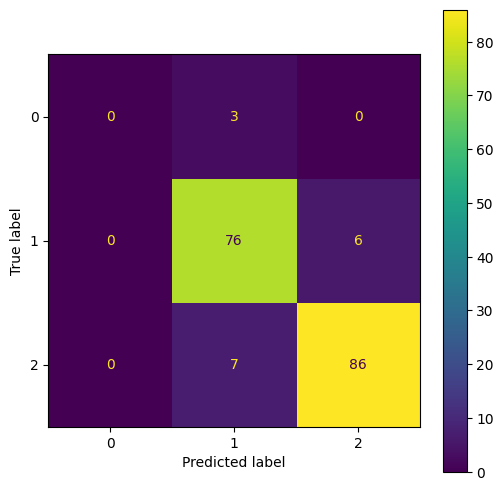

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.88      0.93      0.90        82
           3       0.93      0.92      0.93        93

    accuracy                           0.91       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.90      0.91      0.90       178

KNN Accuracy: 91.01%
KNN F1-score: 90.26%
KNN precision: 89.55%
KNN recall: 91.01%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [51]:
print(confusion_matrix(y_test, pred))
matriz=confusion_matrix(y_test, pred, labels=[1,2,3])
disp=ConfusionMatrixDisplay(matriz)
disp.plot()
plt.show()

print(classification_report(y_test, pred))

rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred, average='weighted')
rf_precision = precision_score(y_test, pred, average='weighted')
rf_recall = recall_score(y_test, pred, average='weighted')

print("KNN Accuracy: {:.2f}%".format(rf_acc * 100))
print("KNN F1-score: {:.2f}%".format(rf_f1 * 100))
print("KNN precision: {:.2f}%".format(rf_precision * 100))
print("KNN recall: {:.2f}%".format(rf_recall * 100))

In [52]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021','alg_3b_2021','alg_4b_2021','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021','am_3b_2021','am_4b_2021','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021','geo_3b_2021','geo_4b_2021','grupo_mate','genero','anios_colegio','condicion_pago','pe1','pe2','horas_asincronas','valoracion_clases','dispos_clases','calidad_internet','Result']].corr()
correlation_matrix["Result"]

id                   0.071744
seccion              0.161837
edad                 0.007708
pf_ac1               0.714527
pf_ac2               0.679026
pf_ac3               0.569857
pf_alg_2019          0.680491
pf_alg_2020          0.642653
alg_1b_2021          0.647188
alg_2b_2021          0.697814
alg_3b_2021          0.681498
alg_4b_2021          0.640814
pf_apm_2019          0.444291
pf_apm_2020          0.444447
am_1b_2021           0.533752
am_2b_2021           0.631673
am_3b_2021           0.640847
am_4b_2021           0.211845
pf_geo_2019          0.684996
pf_geo_2020          0.703427
geo_1b_2021          0.590584
geo_2b_2021          0.685748
geo_3b_2021          0.673218
geo_4b_2021          0.676749
grupo_mate           0.250710
genero              -0.139459
anios_colegio        0.046075
condicion_pago      -0.250710
pe1                 -0.639296
pe2                 -0.610562
horas_asincronas    -0.584546
valoracion_clases   -0.604119
dispos_clases       -0.046582
calidad_in

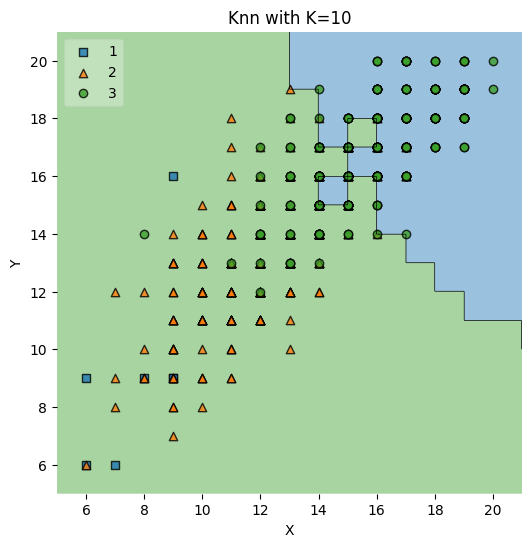

In [53]:
def knn_grafico(data, k):
 x = data[['pf_ac1','pf_ac2']].values
 y = data['Result'].values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
 # Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
 # Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K=10')
 plt.show()

knn_grafico(dataframe, 10)


In [54]:
import joblib
import os

# Guardar el modelo
filename = 'knn_model.sav'
joblib.dump(knn, filename)
# Cargar el modelo
loaded_model = joblib.load(filename)
# Utilizar el modelo cargado para hacer predicciones, tomamos el X_test (PENDIENTE CAMBIAR A UN DATO ENTRADO POR TECLADO)
pred = loaded_model.predict(X_test)
# Obtener la ruta completa al archivo guardado
ruta_completa = os.path.join(os.getcwd(), filename)

# Imprimir la ruta completa al archivo guardado
print("Ruta completa del archivo guardado:", ruta_completa)
print("El valor predecido:",pred[0])

Ruta completa del archivo guardado: /content/knn_model.sav
El valor predecido: 2


In [56]:
import ipywidgets as widgets
from IPython.display import display

datos = {}

def on_dropdown_change(change, descriptionName, text_widget):
    datos[descriptionName] = change.new
    text_widget.value = f"Seleccionado: ({change.new})"

def createComboList(etiquetas, descriptionName):
    valores = list(range(len(etiquetas)))
    etiquetas = etiquetas

    # Crear el combo desplegable
    combo = widgets.Dropdown(options=list(zip(etiquetas, valores)), description=descriptionName, value=None)

    # Crear el widget de texto para mostrar la selección
    text_widget = widgets.Label(value="")

    # Asignar la función al evento de cambio del combo desplegable
    combo.observe(lambda change: on_dropdown_change(change, descriptionName, text_widget), names='value')

    # Mostrar el combo desplegable y el widget de texto en la salida del notebook
    display(widgets.HBox([combo, text_widget]))

datos['id'] = '153'
seccion = input("1. Ingrese seccion: 0:A, 1:B, 2:C, 3:E, 4:F, 5:G, 6:H, 7:CS1, 8:CS2 ")
datos['1. seccion'] = seccion

edad = input("2. Ingrese edad: ")
datos['2. edad'] = edad

seccion_cta = input("3. Ingrese promedio final cta: ")
datos['3. promedio final cta'] = seccion_cta

seccion_act = input("4. Promedio final actitud: ")
datos['4. promedio final actitud'] = seccion_act

seccion_soc = input("5. Ingrese promedio final sociales: ")
datos['5. promedio final sociales'] = seccion_soc

pf_alg_2019 = input("6. Ingrese pf_alg_2019: ")
datos['6. pf_alg_2019'] = pf_alg_2019

pf_alg_2020 = input("7. ngrese pf_alg_2020: ")
datos['7. pf_alg_2020'] = pf_alg_2020

alg_1b_2021 = input("8. Ingrese alg_1b_2021: ")
datos['8. alg_1b_2021'] = alg_1b_2021

alg_2b_2021 = input("9. Ingrese alg_2b_2021: ")
datos['9. alg_2b_2021'] = alg_2b_2021

alg_3b_2021 = input("10. Ingrese alg_3b_2021: ")
datos['10. alg_3b_2021'] = alg_3b_2021

alg_4b_2021 = input("11. Ingrese alg_4b_2021: ")
datos['11. alg_4b_2021'] = alg_4b_2021

pf_apm_2019 = input("12. Ingrese pf_apm_2019: ")
datos['12. pf_apm_2019'] = pf_apm_2019

pf_apm_2020 = input("13. ngrese pf_apm_2020: ")
datos['13. pf_apm_2020'] = pf_apm_2020

am_1b_2021 = input("14. Ingrese am_1b_2021: ")
datos['14. am_1b_2021'] = am_1b_2021

am_2b_2021 = input("15. Ingrese am_2b_2021: ")
datos['15. am_2b_2021'] = am_2b_2021

am_3b_2021 = input("16. Ingrese am_3b_2021: ")
datos['16. am_3b_2021'] = am_3b_2021

am_4b_2021 = input("17. Ingrese am_4b_2021: ")
datos['17. am_4b_2021'] = am_4b_2021

pf_geo_2019 = input("18. Ingrese pf_geo_2019: ")
datos['18. pf_geo_2019'] = pf_geo_2019

pf_geo_2020 = input("19. ngrese pf_geo_2020: ")
datos['19. pf_geo_2020'] = pf_geo_2020

geo_1b_2021 = input("20. Ingrese geo_1b_2021: ")
datos['20. geo_1b_2021'] = geo_1b_2021

geo_2b_2021 = input("21. Ingrese geo_2b_2021: ")
datos['21. geo_2b_2021'] = geo_2b_2021

geo_3b_2021 = input("22. Ingrese geo_3b_2021: ")
datos['22. geo_3b_2021'] = geo_3b_2021

geo_4b_2021 = input("23. Ingrese geo_4b_2021: ")
datos['23. geo_4b_2021'] = geo_4b_2021

createComboList(['Sí', 'No'], '24. ¿Pertenece al grupo de estudio avanzado de matemáticas?')
createComboList(['Masculino', 'Femenino'], '25. Género')
createComboList(['4 años a más', '3 años','2 años','1 años','ninguno'], '26. Años en el colegio')
createComboList(['Beca','Deuda'], '27. Condición')
createComboList(['Muy fácil', 'Fácil', 'Ni fácil ni difícil', 'Difícil', 'Muy difícil'], '28.¿El curso es fácil o difícil?')
createComboList(['Excelente', 'Bueno', 'Indiferente', 'Malo', 'Muy malo'], '29. ¿Cómo consideras a nivel general tu rendimiento académico en los cursos de matemática?')
createComboList(['4 a más','3 horas','2 horas','1 hora','Solo las horas de clase'], '30. Horas de estudio asíncronas')
createComboList(['Muy satisfecho','Satisfecho','Indiferente','Insatisfecho','Muy insatisfecho'], '31. Valoración de clase')
createComboList(['5 a más Dispositivos','4 Dispositivos','3 Dispositivos','2 Dispositivos','1 Dispositivo'], '32. Dispositivos de clase : tablet, computadora, laptop, smartphone, chromebook')
createComboList(['Muy buena','Buena','Media','Mala','Muy mala'], '33. Calidad de internet')




1. Ingrese seccion: 0:A, 1:B, 2:C, 3:E, 4:F, 5:G, 6:H, 7:CS1, 8:CS2 0
2. Ingrese edad: 13
3. Ingrese promedio final cta: 16
4. Promedio final actitud: 15
5. Ingrese promedio final sociales: 17
6. Ingrese pf_alg_2019: 15
7. ngrese pf_alg_2020: 16
8. Ingrese alg_1b_2021: 16
9. Ingrese alg_2b_2021: 16
10. Ingrese alg_3b_2021: 18
11. Ingrese alg_4b_2021: 18
12. Ingrese pf_apm_2019: 17
13. ngrese pf_apm_2020: 18
14. Ingrese am_1b_2021: 18
15. Ingrese am_2b_2021: 18
16. Ingrese am_3b_2021: 14
17. Ingrese am_4b_2021: 15
18. Ingrese pf_geo_2019: 16
19. ngrese pf_geo_2020: 15
20. Ingrese geo_1b_2021: 17
21. Ingrese geo_2b_2021: 17
22. Ingrese geo_3b_2021: 17
23. Ingrese geo_4b_2021: 17


In [57]:
for key in datos:
    try:
        datos[key] = int(datos[key])
    except ValueError:
        try:
            datos[key] = float(datos[key])
        except ValueError:
            pass

datos = list(datos.values())

print("Los datos ingresados son:")
print(datos)


Los datos ingresados son:
[153, 0, 13, 16, 15, 17, 15, 16, 16, 16, 18, 18, 17, 18, 18, 18, 14, 15, 16, 15, 17, 17, 17, 17, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1]


In [58]:
datos = np.array(datos, dtype=np.int16)
datos= datos.reshape(1,34)
print(datos)
ndatos = scaler.transform(datos)
print(ndatos)

[[153   0  13  16  15  17  15  16  16  16  18  18  17  18  18  18  14  15
   16  15  17  17  17  17   0   1   1   1   1   1   1   1   3   1]]
[[ 0.21408451  0.         -0.33333333  0.71428571  0.64285714  0.72727273
   0.44444444  0.71428571  0.69230769  0.73333333  0.86666667  0.6
   0.83333333  0.77777778  0.92307692  0.86666667  0.6         0.72222222
   0.66666667  0.54545455  0.8         0.85714286  0.8         0.52
   0.          0.33333333 -1.          1.          0.5         0.5
   0.33333333  0.33333333  0.5         0.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [59]:
# Cargar el modelo ya entrenado y testeado
model = joblib.load('knn_model.sav')
#Hacer una nueva prediccion
y_pred= model.predict(ndatos)
print(y_pred)
if y_pred==3:
  print("****El diagnostico es que el nivel acadèmico pertenece a la categoria Rendimiento óptimo****")
  print("Resultado dado en base al 95% de accuraccy")
else:
  if y_pred==2:
    print("****El diagnostico es que el nivel acadèmico pertenece a la categoria Rendimiento mejorable****")
    print("Resultado dado en base al 95% de accuraccy")
  else:
    print("****El diagnostico es que el nivel acadèmico pertenece a la categoria Rendimiento bajo****")
    print("Resultado dado en base al 95% de accuraccy")

[3]
****El diagnostico es que el nivel acadèmico pertenece a la categoria Rendimiento óptimo****
Resultado dado en base al 95% de accuraccy
